## US Population Modeling
## Jean Marie Linhart
## Math 475

Data kept in USPopulation.csv.  Do NOT write to this file. $\textbf{This means you. }$

Linear A and r are 6.31870740867 0.0196230740592
Nonlinear A and r are  [  1.63219275e+01   1.36356507e-02]
Covariance matrix is  [[  2.40886171e+00  -7.56436294e-04]
 [ -7.56436294e-04   2.45797872e-07]]


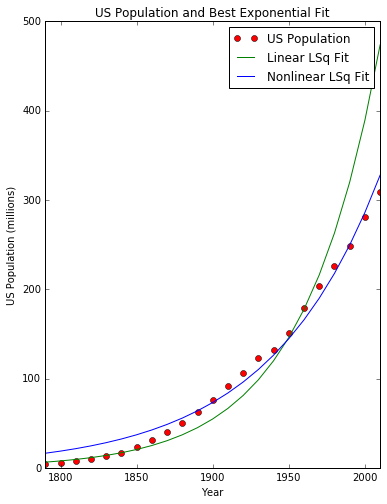

Final data point = 308.745538 Estimated value =  327.783264889


Linear L, A and r are 350 77.2862419809 0.026926590088
Nonlinear L, A and r are  [  4.86475249e+02   5.80898166e+01   2.07764405e-02]
Covariance matrix is  [[  1.22959404e+03  -2.03511070e+01  -2.82128109e-02]
 [ -2.03511070e+01   1.32328720e+01   1.70773237e-03]
 [ -2.82128109e-02   1.70773237e-03   7.72815131e-07]]


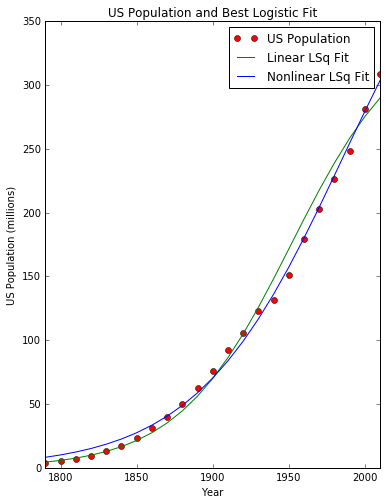

Final data point = 308.745538 Estimated value =  303.819041725


/Users/jmlinhart/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:42: RuntimeWarning: overflow encountered in exp


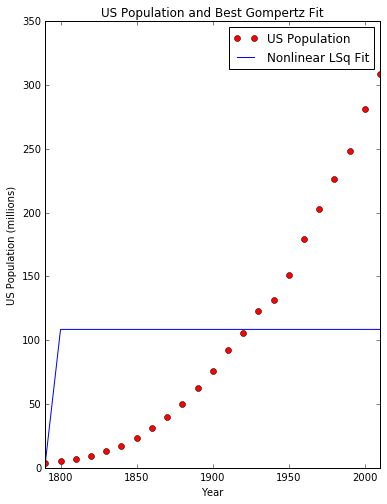

In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#--------------------------------------------------
#1.  Read in the US Population Data, set up data
CensusFile = open('USPopulation.csv', 'r') #Don't you dare overwrite this file!
N = 23 #23 data points.
i = 0
j = 0
USyears = np.zeros([N], dtype=int)
USPop = np.zeros([N], dtype=int)
for line in CensusFile:
    if i == 0 or i==1:
        i=i+1
    else:
        values = line.split(',')
        USyears[j] = int(values[0])
        USPop[j] = int(values[1])
        j = j+1
        i = i+1

CensusFile.close()
USTime = USyears - 1790 # base at 0
USPop_mil = USPop/1.e6

#Floating point types, used by curve_fit
USTime_fl = USTime.astype(np.float64)
USPop_fl = USPop.astype(np.float64)/1e6


#--------------------------------------------------
#2. Define Functions needed for curve fitting.  
def my_exponential(t, A, r):
    return A*np.exp(t*r)

def my_logistic(t, L, A, r):
    return L/(1+A*np.exp(-r*t))

def my_Gompertz(t, L, b,r):
    return L*np.exp(-b*np.exp(-r*t))

def R2value(ydata, yapp):
    ymean = np.mean(ydata)
    R2 = 1.0 - (np.sum((yapp - ydata)**2))/(np.sum((ydata - ymean)**2))
    return R2

#--------------------------------------------------
#3.  Make Exponential fits



USPopExpLin = my_exponential(USTime, np.exp(lnAe), re)

#popt, pcov = curve_fit(my_exponential, USTime_fl, USPop_fl)









#--------------------------------------------------
#4. Make Logistic fits



USPopLogLin = my_logistic(USTime, Lguess, np.exp(lnAl), -mrl)





plt.figure(figsize=(6,8))
plt.plot(USyears, USPop_mil, 'o', color='r', label='US Population')
plt.plot(USyears, USPopLogLin, color='g', label='Linear LSq Fit') 

plt.ylabel('US Population (millions)')
plt.xlabel('Year')
plt.xlim([1790, 2010])
plt.legend()
plt.title('US Population and Best Logistic Fit')
plt.show()
plt.close()


#--------------------------------------------------
#4. Make Gompertz fits
